# Tutorial Overview

This file illustrates basic usage of the python_gclda toolbox. Specifically, we perform the following steps:

* Import the python modules
* Build a gclda dataset object using a small subset of the Neurosynth corpus, and import the data into this object from raw txt files 
* Build a gclda model instance
* Train the gclda model instance (using fewer iterations than should be used for actual modeling)
* Export figures that illustrate all topics in the trained model
* View a few of the topics

Note: this tutorial will assume that your working directory is the 'examples/' subdirectory within the gclda package. If it is not, the relative paths to the datasets need to be modified when creating the variable 'dataset_label' below.


In [1]:
# Import packages
from os import mkdir
from os.path import join, isdir

from gclda.dataset import Dataset
from gclda.model import Model

### Create a dataset object instance and import data

For this tutorial, we use a subset of 1000 documents from the neurosynth dataset. 
This will run faster, but produce sparser and noisier topics than the full dataset


In [2]:
%%time
# Create dataset object instance: 'dat'
# Inputs:
dataset_label = '2015Filtered2_1000docs'  # The directory name containing
                                          # the dataset .txt files, which
                                          # will be used as a 'dataset label'
dataset_dir = '../datasets/neurosynth/'  # The relative path from the working
                                         # directory to the root-directory
                                         # containing the dataset folder
dat = Dataset(dataset_label, dataset_dir)  # Create a gclda dataset object 'dat'

# View dataset object after importing data:
dat.display_dataset_summary()

--- Dataset Summary ---
self.dataset_label  = '2015Filtered2_1000docs'
	word-types:   6755
	word-indices: 40874
	peak-indices: 34213
	documents:    1000
	peak-dims:    3
CPU times: user 68.7 ms, sys: 18.9 ms, total: 87.6 ms
Wall time: 86.2 ms


### Create a gclda model object

For this tutorial, we will create gclda model instance, using 100 topics, 2 subregions per topic, and default values for all other hyper-parameters (See other sample scripts and documentation for details about all hyperparameters)

In [3]:
%%time
n_topics = 100
n_regions = 2

# Create the model instance
model = Model(dat, n_topics, n_regions)

# Randomly initialize the model
model.initialize()

# View the model after initialization:
model.display_model_summary()

Constructing GC-LDA Model
Initializing GC-LDA Model
--- Model Summary ---
 Current State:
	 Current Iteration   = 0
	 Initialization Seed = 1
	 Current Log-Likely  = -899074.166361
 Model Hyper-Parameters:
	 Symmetric = False
	 n_topics  = 100
	 n_regions = 2
	 alpha     = 0.100
	 beta      = 0.010
	 gamma     = 0.010
	 delta     = 1.000
	 roi_size  = 50.000
	 dobs      = 25
 Model Training-Data Information:
	 Dataset Label                 = 2015Filtered2_1000docs
	 Word-Tokens (n_word_tokens)   = 40874
	 Peak-Tokens (n_peak_tokens)   = 34213
	 Word-Types (n_word_labels)    = 6755
	 Documents (n_docs)            = 1000
	 Peak-Dimensions (n_peak_dims) = 3
CPU times: user 1.71 s, sys: 523 ms, total: 2.23 s
Wall time: 1.83 s


### Model Training

We will train for just a few iterations for the sake of time here (should take about 5 minutes). 
When training a full model, we recommend running at least 1000 total iterations.

In [4]:
%%time
iterations = 25
# During training, the model will print details about the model log-likelihood, etc., to the
# console. loglikely_freq controls how often we compute the log-likelihood (which slows
# inference down slightly). verbose controls how much information gets printed to the console
# (0 = minimal, 2 = maximal).
for i in range(iterations):
    model.run_complete_iteration(loglikely_freq=1, verbose=1)

# View the model after training:
model.display_model_summary()

Iter 0001 Log-likely: x =  -504020.6, w =  -402906.5, tot =  -906927.1
Iter 0002 Log-likely: x =  -504042.0, w =  -406163.4, tot =  -910205.4
Iter 0003 Log-likely: x =  -503975.8, w =  -407996.2, tot =  -911972.1
Iter 0004 Log-likely: x =  -503701.8, w =  -408518.6, tot =  -912220.4
Iter 0005 Log-likely: x =  -503091.1, w =  -409184.0, tot =  -912275.1
Iter 0006 Log-likely: x =  -502153.0, w =  -409390.2, tot =  -911543.2
Iter 0007 Log-likely: x =  -500933.6, w =  -410406.0, tot =  -911339.5
Iter 0008 Log-likely: x =  -499497.4, w =  -410328.4, tot =  -909825.8
Iter 0009 Log-likely: x =  -498064.0, w =  -410736.3, tot =  -908800.3
Iter 0010 Log-likely: x =  -496825.8, w =  -410949.6, tot =  -907775.5
Iter 0011 Log-likely: x =  -496297.3, w =  -410670.8, tot =  -906968.1
Iter 0012 Log-likely: x =  -495894.8, w =  -411079.2, tot =  -906974.0
Iter 0013 Log-likely: x =  -495067.2, w =  -411346.7, tot =  -906413.8
Iter 0014 Log-likely: x =  -494453.3, w =  -411594.8, tot =  -906048.0
Iter 0

### Export figures for trained model

Here we export figures to file illustrating all topics in our trained model. Results will be placed into the subdirectories in the folder: 'examples/gclda_tutorial_results/' based on model parameter settings and how many iterations have run.

Note that these topics will be **much** noiser than for a properly trained model (although some of the topics in these example results will capture known functional regions; e.g., topics 14/15). For results similar to those presented in our papers, you should
* Use the complete dataset (and appropriate hyper-parameter settings)
* Train until log-likelihood converges 




In [5]:
%%time
# Set up a rootdirectory to serve as a directory to store all tutorial results
results_rootdir = 'gclda_tutorial_results'  # We note that these results come from the
                                            # tutorial, as opposed to the scripts for
                                            # running full models
if not isdir(results_rootdir):
    mkdir(results_rootdir)

# We first use the method 'get_model_display_string' to get a string identifier that is
# unique to the combination of:
#  - dataset_label
#  - All model hyperparameters
# This is useful for saving model output

# Append the current model iteration to this directory name
output_data_dir = join(results_rootdir,
                       '{0}_Iteration_{1:04d}'.format(model.model_name,
                                                      model.iter))

# We create a subdirectory of the outputdirectory to store figures
output_figures_dir = join(output_data_dir, 'Figures')

# Export some files giving topic-word distributions, as well as detailed accounts of
# all token->assignments
model.print_all_model_params(output_data_dir)

# Export Figures illustrating the spatial-extent and high probability word-types for
# the each topic in the model
model.print_topic_figures(output_figures_dir, backgroundpeakfreq=1)

CPU times: user 1min 24s, sys: 1.34 s, total: 1min 25s
Wall time: 1min 28s


### View a few of the saved image files illustrating topics

The easiest way to view all topic images is to just browse the results folder. 

For illustrative purposes, I've selected a few of the cleaner topics that get extracted in the tutorial to view directly in the notebook.

#### Figure explanation
Each topic is illustrated using a panel of 4 subplots. The first three subplots depict all of the activation peaks that are currently assigned to subregion 1 (in red) and subregion 2 (in blue) of the topic, plotted against a background (in gray) showing all peaks in the entire corpus. The three plots, from top-left, correspond to the (1) Coronal, (2) Sagittal and (3) Axial viewpoints. Note that the grey background roughly approximates the shape of the brain. In the fourth subplot, we show the K words with the highest probabilities under the the topic. Beneath that, we show the weighting--p(r|t)--of the two subregions, as well as the mean of the Gaussian distribution for each subregion.

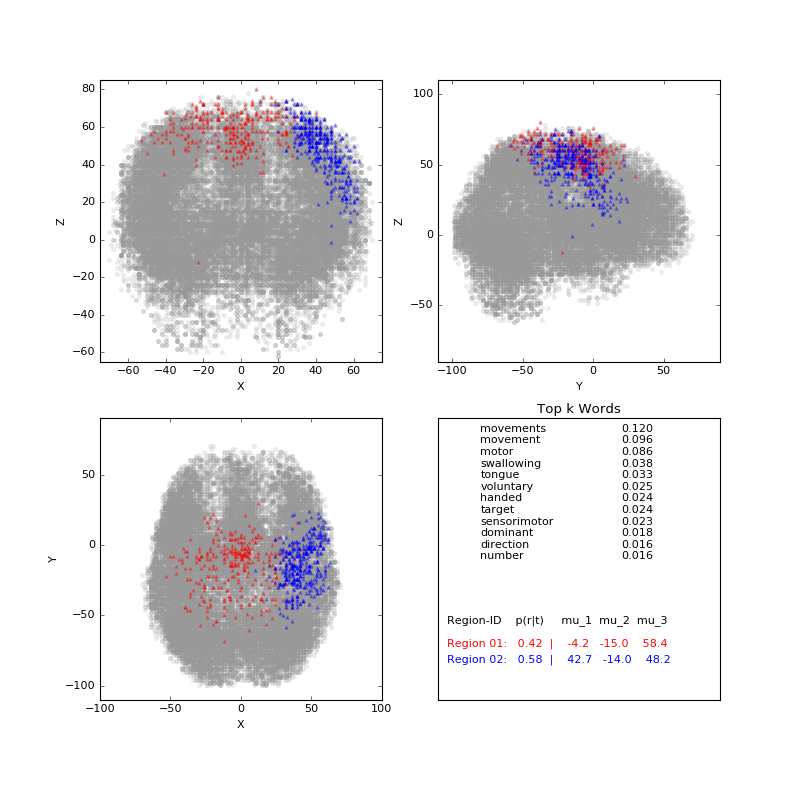

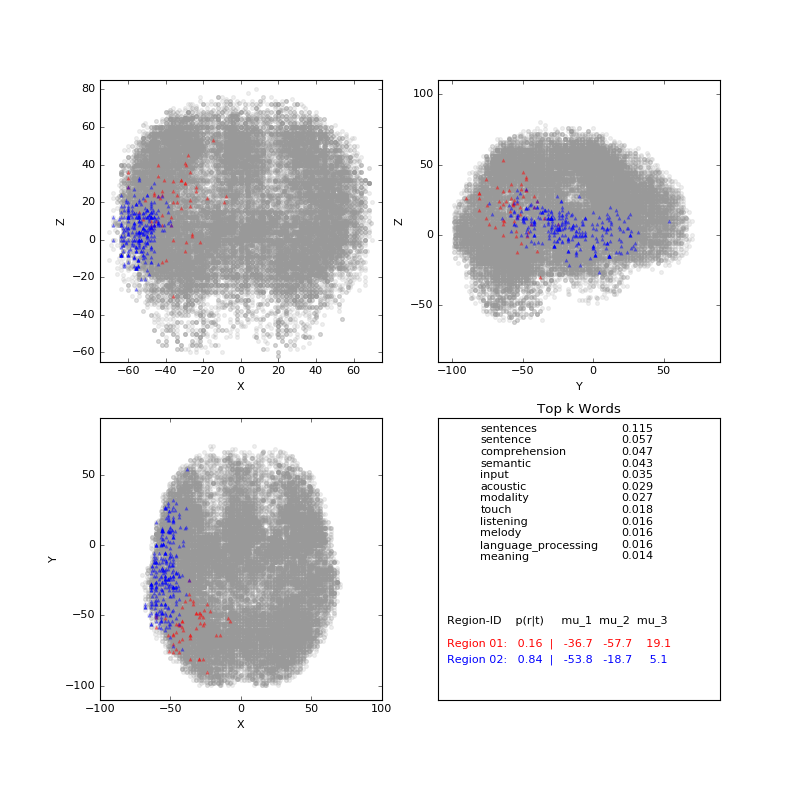

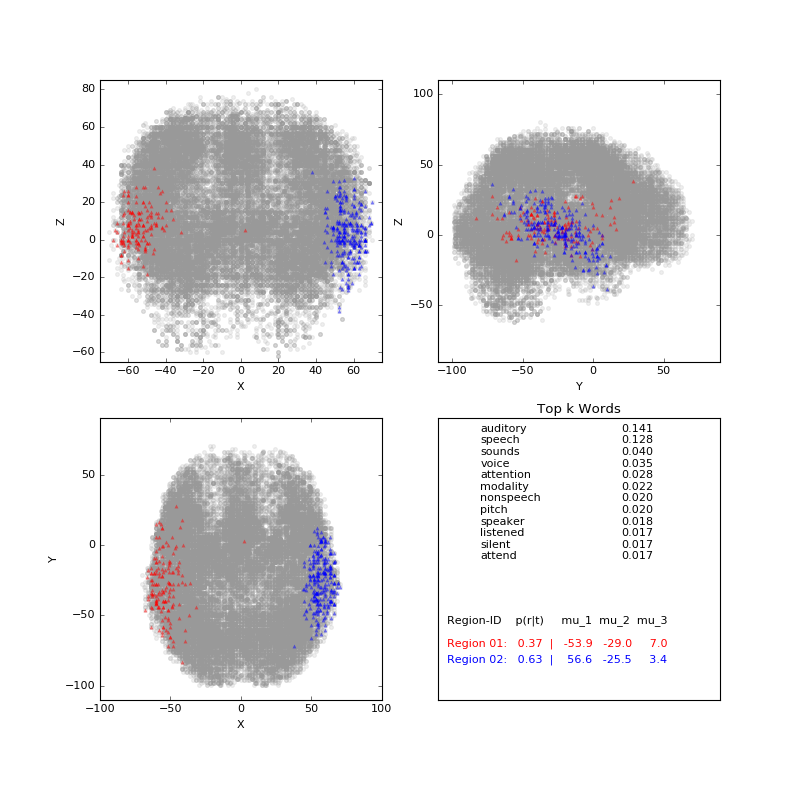

In [6]:
from IPython.display import Image
from IPython.display import display

display(Image(filename=join(output_figures_dir, 'Topic_14.png')))
display(Image(filename=join(output_figures_dir, 'Topic_28.png')))
display(Image(filename=join(output_figures_dir, 'Topic_60.png')))